In [1]:
from main import *
import test
%matplotlib inline

# Introduction

Alice, Bob, and Daniel are friends learning machine learning together. After watching a few lectures, they are very proud of having learned many useful tools, including linear and logistic regression, non-linear features, regularization, and kernel tricks. To see how these methods can be used to solve a real life problem, they decide to get their hands dirty with the famous digit recognition problem using the MNIST (Mixed National Institute of Standards and Technology) database.

Hearing that you are an excellent student in the MITx machine learning class with solid understanding of the material and great coding ability in Python, they decide to invite you to their team and help them with implementing these different algorithms.

The MNIST database contains binary images of handwritten digits commonly used to train image processing systems. The digits were collected from among Census Bureau employees and high school students. The database contains 60,000 training digits and 10,000 testing digits, all of which have been size-normalized and centered in a fixed-size image of 28 × 28 pixels. Many methods have been tested with this dataset and in this project, you will get a chance to experiment with the task of classifying these images into the correct digit using some of the methods you have learned so far.

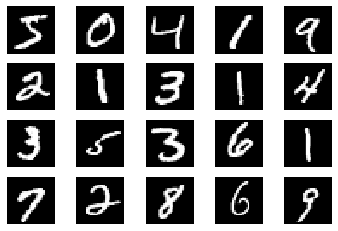

In [13]:
# Load MNIST data
train_x, train_y, test_x, test_y = get_MNIST_data()
# Plot the first 20 images of the training set
plot_images(train_x[0:20, :])

# Linear Regression with Closed Form Solution

After seeing the problem, your classmate Alice immediately argues that we can apply a linear regression model, as the labels are numbers from 0-9, very similar to the example we learned from the lecture. Though being a little doubtful, you decide to have a try and start simple by using the raw pixel values of each image as features.

Alice wrote a skeleton code `run_linear_regression_on_MNIST` in main.py, but she needs your help to complete the code and make the model work.


### Closed Form Solution of Linear Regression

Recall:

$ \theta = (X^T X + \lambda I)^{-1} X^T Y $

where $ I $ is the identity matrix.

Write a function `closed_form` that computes this closed form solution given features $ X $, labels $ Y $, and the regularization parameter $ \lambda $.

In [ ]:
def closed_form(X, Y, lambda_factor):
    """
    Computes the closed form solution of linear regression with L2 regularization

    Args:
        X - (n, d + 1) NumPy array (n datapoints each with d features plus the bias feature in the first dimension)
        Y - (n, ) NumPy array containing the labels (a number from 0-9) for each
            data point
        lambda_factor - the regularization constant (scalar)
    Returns:
        theta - (d + 1, ) NumPy array containing the weights of linear regression. Note that theta[0]
        represents the y-axis intercept of the model and therefore X[0] = 1
    """
    n = X.shape[1]
    I = np.eye(n)
    A = np.linalg.inv(X.T @ X + lambda_factor * I)
    
    theta =  A @ X.T @ Y
    
    return theta

    raise NotImplementedError

Test on given problem:

In [14]:
X = np.array([[0.69665959, 0.1176613 ],
 [0.31760089, 0.79518646],
 [0.00999331, 0.47771456],
 [0.74631743, 0.97829618],
 [0.86107641, 0.48218395],
 [0.63610549, 0.57816273],
 [0.28001767, 0.15622796],
 [0.88951132, 0.29489633],
 [0.23763551, 0.15654827],
 [0.17375538, 0.10250591]])
Y = np.array([0.47635682, 0.59191978, 0.35434797, 0.7197702,  0.04977253, 0.62177976,
 0.86412764, 0.86252658, 0.49849733, 0.29968752])
lambda_factor = 0.32809342846061595

# Submission output: [0.49272364 0.41464331]

In [15]:
closed_form(X, Y, lambda_factor)

array([0.49272363, 0.41464332])

## Test Error on Linear Regression
Apply the linear regression model on the test set. For classification purpose, you decide to round the predicted label into numbers 0-9.

**Note**: For this project we will be looking at the error rate defined as the fraction of labels that don't match the target labels, also known as the "gold labels" or ground truth. 

In [16]:
print('Linear Regression test_error =', run_linear_regression_on_MNIST(lambda_factor=1))

Linear Regression test_error = 0.7697


In [17]:
print('Linear Regression test_error =', run_linear_regression_on_MNIST(lambda_factor=.1))

Linear Regression test_error = 0.7698


In [18]:
print('Linear Regression test_error =', run_linear_regression_on_MNIST(lambda_factor=.01))

Linear Regression test_error = 0.7702


Adjusting the $\lambda$ factor does little to improve the test error, which suggests that linear regression is not an appropriate approach to this problem. 

# Support Vector Machine

Bob thinks it is clearly not a regression problem, but a classification problem. He thinks that we can change it into a binary classification and use the support vector machine we learned in Lecture 4 to solve the problem. In order to do so, he suggests that we can build an one vs. rest model for every digit. For example, classifying the digits into two classes: 0 and not 0.

Bob wrote a function `run_svm_one_vs_rest_on_MNIST` where he changed the labels of digits 1-9 to 1 and keeps the label 0 for digit 0. He also found that sklearn package contains an SVM model that you can use directly. He gave you the link to this model and hopes you can tell him how to use that.

In [ ]:
def one_vs_rest_svm(train_x, train_y, test_x):
    """
    Trains a linear SVM for binary classifciation

    Args:
        train_x - (n, d) NumPy array (n datapoints each with d features)
        train_y - (n, ) NumPy array containing the labels (0 or 1) for each training data point
        test_x - (m, d) NumPy array (m datapoints each with d features)
    Returns:
        pred_test_y - (m,) NumPy array containing the labels (0 or 1) for each test data point
    """
    clf = LinearSVC(random_state=0, C=0.1)
    clf.fit(train_x, train_y) 
    
    return clf.predict(test_x)    
    
    raise NotImplementedError

In [19]:
print('SVM one vs. rest test_error:', run_svm_one_vs_rest_on_MNIST())

SVM one vs. rest test_error: 0.0075


In fact, `sklearn` already implements a multiclass SVM with a one-vs-rest strategy. Use `LinearSVC` to build a multiclass SVM model.

In [ ]:
def multi_class_svm(train_x, train_y, test_x):
    """
    Trains a linear SVM for multiclass classifciation using a one-vs-rest strategy

    Args:
        train_x - (n, d) NumPy array (n datapoints each with d features)
        train_y - (n, ) NumPy array containing the labels (int) for each training data point
        test_x - (m, d) NumPy array (m datapoints each with d features)
    Returns:
        pred_test_y - (m,) NumPy array containing the labels (int) for each test data point
    """
    clf = LinearSVC(random_state=0, C=0.1)
    clf.fit(train_x, train_y) 
    
    return clf.predict(test_x)    

    raise NotImplementedError

def run_multiclass_svm_on_MNIST():
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    pred_test_y = multi_class_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error

In [20]:
print('Multiclass SVM test_error:', run_multiclass_svm_on_MNIST())

Multiclass SVM test_error: 0.0819


# Multinomial (Softmax) Regression and Gradient Descent
Daniel suggests that instead of building ten models, we can expand a single logistic regression model into a multinomial regression and solve it with similar gradient descent algorithm.

The main function which you will call to run the code you will implement in this section is run_softmax_on_MNIST in main.py (already implemented). In the appendix at the bottom of this page, we describe a number of the methods that are already implemented for you in softmax.py that will be useful.

In order for the regression to work, you will need to implement three methods. Below we describe what the functions should do. We have included some test cases in test.py to help you verify that the methods you have implemented are behaving sensibly.

## Compute Softmax Probabilities

Write a function `compute_probabilities` that computes, for each data point  $x^{(i)}$, the probability that  $x^{(i)}$  is labeled as  $j$  for  $j=0,1, \dots ,k−1$.

The softmax function  $h$  for a particular vector  $x$  requires computing

\begin{equation}
  h(x) = \frac{1}{\sum _{j=0}^{k-1} e^{\theta _ j \cdot x / \tau }} \begin{bmatrix}  e^{\theta _0 \cdot x / \tau } \\ e^{\theta _1 \cdot x / \tau } \\ \vdots \\ e^{{{\theta _{k-1}}}  \cdot x / \tau } \end{bmatrix},
\end{equation}

where  $\tau >0$  is the **temperature parameter**. When computing the output probabilities (they should always be in the range  $[0,1]$), the terms  $e^{\theta _ j \cdot x / \tau }$  may be very large or very small, due to the use of the exponential function. This can cause numerical or overflow errors. To deal with this, we can simply subtract some fixed amount  $c$  from each exponent to keep the resulting number from getting too large. Since

\begin{align}
  h(x) = \frac{e^{-c}}{e^{-c}\sum _{j=0}^{k-1} e^{\theta _ j \cdot x / \tau }} \begin{bmatrix}  e^{\theta _0 \cdot x / \tau } \\ e^{\theta _1 \cdot x / \tau } \\ \vdots \\ e^{{{\theta _{k-1}}}  \cdot x / \tau } \end{bmatrix} \\ = \frac{1}{\sum _{j=0}^{k-1} e^{[\theta _ j \cdot x / \tau ] - c}} \begin{bmatrix}  e^{[\theta _0 \cdot x / \tau ] - c} \\ e^{[\theta _1 \cdot x / \tau ] - c} \\ \vdots \\ e^{[{{\theta _{k-1}}}  \cdot x / \tau ] - c} \end{bmatrix},
\end{align}

In [23]:
def compute_probabilities(X, theta, temp_parameter):
    """
    Computes, for each datapoint X[i], the probability that X[i] is labeled as j
    for j = 0, 1, ..., k-1

    Args:
        X - (n, d) NumPy array (n datapoints each with d features)
        theta - (k, d) NumPy array, where row j represents the parameters of our model for label j
        temp_parameter - the temperature parameter of softmax function (scalar)
    Returns:
        H - (k, n) NumPy array, where each entry H[j][i] is the probability that X[i] is labeled as j
    """
    # Preliminary calculation to find c
    tau = temp_parameter
    A = theta @ (X.T / tau)
    
    # Calculate c
    c = np.amax(A, axis=0)
    
    # Pre-calculate H and denominator
    H = np.exp(A - c)
    den = np.sum(H, axis=0)
    
    # Divide each column by the appropriate value
    H = H / den
    
    return H
    
    raise NotImplementedError

In [3]:
test.check_compute_probabilities()

PASS Compute probabilities 


## Cost Function

The cost function  $J(\theta)$  is given by:

\begin{equation}
  J(\theta ) = -\frac{1}{n}\Bigg[\sum _{i=1}^ n \sum _{j={{0}} }^{{{k-1}} } [[y^{(i)} == j]] \log {\frac{e^{\theta _ j \cdot x^{(i)} / \tau }}{\sum _{l={{0}} }^{{{k-1}} } e^{\theta _ l \cdot x^{(i)} / \tau }}}\Bigg] + \frac{\lambda }{2}\sum _{{{j=0}} }^{{{k-1}} }\sum _{{{i}} =0}^{d-1} \theta _{{{ji}} }^2
\end{equation}

In [ ]:
def compute_cost_function(X, Y, theta, lambda_factor, temp_parameter):
    """
    Computes the total cost over every datapoint.

    Args:
        X - (n, d) NumPy array (n datapoints each with d features)
        Y - (n, ) NumPy array containing the labels (a number from 0-9) for each
            data point
        theta - (k, d) NumPy array, where row j represents the parameters of our
                model for label j
        lambda_factor - the regularization constant (scalar)
        temp_parameter - the temperature parameter of softmax function (scalar)

    Returns
        c - the cost value (scalar)
    """
    # Set n
    n = X.shape[0]
    
    # Compute probabilities with previous function (a (k,n) matrix)
    p = np.clip(compute_probabilities(X, theta, temp_parameter), 1e-15, 1-1e-15)
    
    # Pick out the appropriate probabilities from p (probabilities corresponding to the correct label)
    p_true = np.choose(Y, p)
    non_regularized_cost = -(1 / n) * np.sum(np.log(p_true)) # Compute first term
    
    # Compute second term
    regularized_cost = 0.5 * lambda_factor * (np.sum(theta ** 2))
    
    return non_regularized_cost + regularized_cost
    
    raise NotImplementedError

In [2]:
test.check_compute_cost_function()

PASS Compute cost function 


## Gradient Descent
Now, in order to run the gradient descent algorithm to minimize the cost function, we need to take the derivative of  $J(\theta)$  wrt a particular  $\theta_m$. 

\begin{align}
   \frac{\partial J(\theta )}{\partial \theta _ m} = \frac{\partial }{\partial \theta _ m}\Bigg[-\frac{1}{n}\Bigg[\sum _{i=1}^ n \sum _{j=0}^{k-1} [[y^{(i)} == j]] \log p(y^{(i)} = j | x^{(i)}, \theta ) \Bigg] + \frac{\lambda }{2}\sum _{j=0}^{k-1}\sum _{i=0}^{d-1} \theta _{ji}^2\Bigg] \\
    = -\frac{1}{\tau n} \sum _{i = 1} ^{n} [x^{(i)}([[y^{(i)} == m]] - p(y^{(i)} = m | x^{(i)}, \theta ))] + \lambda \theta _ m
\end{align}

To run gradient descent, we will update  $\theta$  at each step with $\theta \leftarrow \theta - \alpha \nabla _{\theta } J(\theta )$, where $\alpha$ is the learning rate.

In [18]:
def run_gradient_descent_iteration(X, Y, theta, alpha, lambda_factor, temp_parameter):
    """
    Runs one step of batch gradient descent

    Args:
        X - (n, d) NumPy array (n datapoints each with d features)
        Y - (n, ) NumPy array containing the labels (a number from 0-9) for each
            data point
        theta - (k, d) NumPy array, where row j represents the parameters of our
                model for label j
        alpha - the learning rate (scalar)
        lambda_factor - the regularization constant (scalar)
        temp_parameter - the temperature parameter of softmax function (scalar)

    Returns:
        theta - (k, d) NumPy array that is the final value of parameters theta
    """
    itemp=1./temp_parameter
    num_examples = X.shape[0]
    num_labels = theta.shape[0]
    probabilities = compute_probabilities(X, theta, temp_parameter)
    # M[i][j] = 1 if y^(j) = i and 0 otherwise.
    M = sparse.coo_matrix(([1]*num_examples, (Y,range(num_examples))), shape=(num_labels,num_examples)).toarray()
    non_regularized_gradient = np.dot(M-probabilities, X)
    non_regularized_gradient *= -itemp/num_examples
    return theta - alpha * (non_regularized_gradient + lambda_factor * theta)

In [4]:
test.check_run_gradient_descent_iteration()

PASS Run gradient descent iteration 


## Test Error on Softmax Regression

Implement softmax regression on MNIST using given functions from the main module and explore the effects of the temperature parameter in our algorithm.

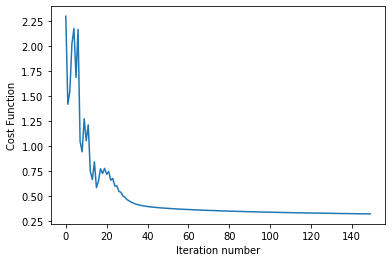

Softmax test_error: 0.08399999999999996


In [3]:
print('Softmax test_error:', run_softmax_on_MNIST(temp_parameter=0.5)) # 2m 7s runtime

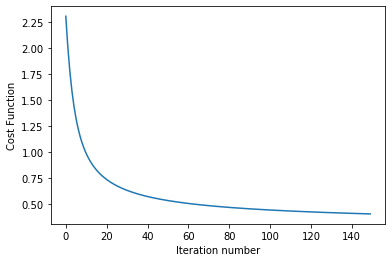

Softmax test_error: 0.10050000000000003


In [4]:
print('Softmax test_error:', run_softmax_on_MNIST(temp_parameter=1)) # 2m 6s runtime

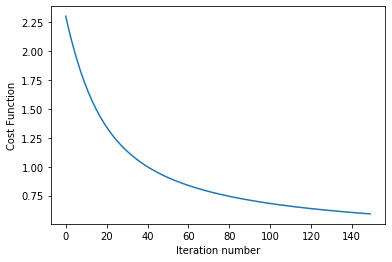

Softmax test_error: 0.1261


In [5]:
print('Softmax test_error:', run_softmax_on_MNIST(temp_parameter=2)) # 2m 9s runtime

From the softmax equation, we can see that a smaller temperature parameter favors large thetas, decreasing variance and causing the model to be more "wary" of lower probability candidates. A large temperature, on the other hand, increases variance, flattening the resulting probability distribution.

The test errors calculated above demonstrate this idea. The cost increases with temperature, since the model is less confident (lower relative probability) in its prediction.

Also note that vectorizing `compute_cost_function` decreased runtime from about **127 seconds to 90 seconds**, which is a pretty good improvement.

# Changing Labels

We now wish to classify the digits by their $(mod \ 3)$ value, such that the new label  $y^{(i)}$  of sample  $i$  is the old  $y^{(i)} \ (mod \ 3)$ .

## Using the Current Model - update target

Given that we already classified every  $x(i)$  as a digit, we could use the model we already trained and just calculate our (mod 3) estimations.

Implement `update_y` function, which changes the old digit labels for the training and test set for the new (mod 3) labels.

In [ ]:
def update_y(train_y, test_y):
    """
    Changes the old digit labels for the training and test set for the new (mod 3)
    labels.

    Args:
        train_y - (n, ) NumPy array containing the labels (a number between 0-9)
                 for each datapoint in the training set
        test_y - (n, ) NumPy array containing the labels (a number between 0-9)
                for each datapoint in the test set

    Returns:
        train_y_mod3 - (n, ) NumPy array containing the new labels (a number between 0-2)
                     for each datapoint in the training set
        test_y_mod3 - (n, ) NumPy array containing the new labels (a number between 0-2)
                    for each datapoint in the test set
    """
    
    train_y_mod3 = train_y % 3
    test_y_mod3 = test_y % 3
    
    return train_y_mod3, test_y_mod3
    raise NotImplementedError

In [2]:
test.check_update_y()

PASS Update y 


## Using the Current Model - compute test error

Implement `compute_test_error_mod3` function, which takes the test points `X`, their correct labels `Y` (digits (mod 3) from 0-2), `theta`, and the `temp_parameter`, and returns the error.

In [3]:
def compute_test_error_mod3(X, Y, theta, temp_parameter):
    """
    Returns the error of these new labels when the classifier predicts the digit. (mod 3)

    Args:
        X - (n, d - 1) NumPy array (n datapoints each with d - 1 features)
        Y - (n, ) NumPy array containing the labels (a number from 0-2) for each
            data point
        theta - (k, d) NumPy array, where row j represents the parameters of our
                model for label j
        temp_parameter - the temperature parameter of softmax function (scalar)

    Returns:
        test_error - the error rate of the classifier (scalar)
    """
    Yp = get_classification(X, theta, temp_parameter)
    Yp = Yp % 3
    
    return 1 - np.mean(Y == Yp)
    raise NotImplementedError

## Using the Current Model - test error


In [7]:
train_x, train_y, test_x, test_y = get_MNIST_data()
theta = read_pickle_data('theta.pkl.gz')

train_y_mod3, test_y_mod3 = update_y(train_y, test_y)
test_error_mod3 = compute_test_error_mod3(test_x, test_y_mod3, theta, temp_parameter=1)

In [8]:
print('Mod 3 test error = ', test_error_mod3)

Mod 3 test error =  0.0978


## Retraining With New Labels

Now suppose that instead we want to retrain our classifier with the new labels. In other words, rather than training the model to predict the original digits and then taking those predictions modulo 3, we explicitly train the model to predict the digits modulo 3 from the original image.

How do you expect the performance to change using the new labels?

Implement `run_softmax_on_MNIST_mod3` to perform this new training; report the new error rate.

In [ ]:
def run_softmax_on_MNIST_mod3(temp_parameter=1):
    """
    Trains Softmax regression on digit (mod 3) classifications.

    See run_softmax_on_MNIST for more info.
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    
    train_y_mod3, test_y_mod3 = update_y(train_y, test_y)
        
    theta, cost_function_history = softmax_regression(train_x, train_y_mod3, temp_parameter, alpha= 0.3, lambda_factor = 1.0e-4, k = 10, num_iterations = 150)
    plot_cost_function_over_time(cost_function_history)
    test_error_mod3 = compute_test_error_mod3(test_x, test_y_mod3, theta, temp_parameter)
    # Save the model parameters theta obtained from calling softmax_regression to disk.
    write_pickle_data(theta, "./thetamod3.pkl.gz")
    
    return test_error_mod3
    raise NotImplementedError

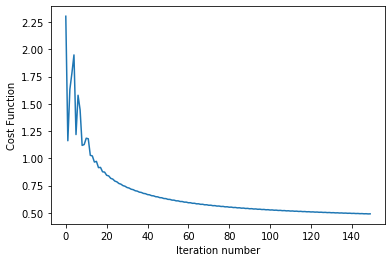

Mod 3 test error =  0.18720000000000003


In [2]:
print('Mod 3 test error = ', run_softmax_on_MNIST_mod3())

Overall performance decreased by using the new labels (18.72% error).

# Dimensionality Reduction Using PCA

PCA finds (orthogonal) directions of maximal variation in the data. In this problem we're going to project our data onto the principal components and explore the effects on performance.

## Project onto Principal Components

Fill in function `project_onto_PC` in features.py that implements PCA dimensionality reduction of dataset  $X$.

Note that to project a given  $n \times d$  dataset  $X$  into its  $k$-dimensional PCA representation, one can use matrix multiplication, after first centering  $X$ :

$\widetilde{X} V$

where  $\widetilde{X}$  is the centered version of the original data  $X$  and  $V$  is the  $d \times k$  matrix whose columns are the top  $k$  eigenvectors of  $\widetilde{X}^T \widetilde{X}$ . This is because the eigenvectors are of unit-norm, so there is no need to divide by their length.

You are given the full principal component matrix  $V'$  as `pcs` in this function.

In [ ]:
def project_onto_PC(X, pcs, n_components):
    """
    Given principal component vectors pcs = principal_components(X)
    this function returns a new data array in which each sample in X
    has been projected onto the first n_components principcal components.
    """
    X = center_data(X)

    return X @ pcs[:,range(n_components)]

    raise NotImplementedError

Note: we only use the training dataset to determine the principal components. **It is improper to use the test dataset for anything except evaluating the accuracy of our predictive model**. If the test data is used for other purposes such as selecting good features, it is possible to overfit the test set and obtain overconfident estimates of a model's performance.

## Testing PCA

Use `project_onto_PC` to compute a 18-dimensional PCA representation of the MNIST training and test datasets, as illustrated in main.py.

Retrain your softmax regression model (using the original labels) on the MNIST training dataset and report its error on the test data, this time using these 18-dimensional PCA-representations rather than the raw pixel values.

If your PCA implementation is correct, the model should perform nearly as well when only given 18 numbers encoding each image as compared to the 784 in the original data (error on the test set using PCA features should be around 0.15). This is because PCA ensures these 18 feature values capture the maximal amount of variation from the original 784-dimensional data.

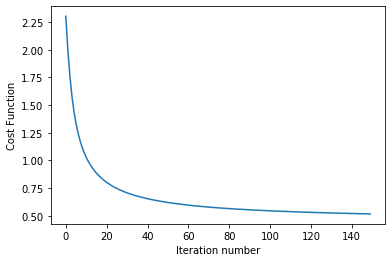

Test error for 18-dimensional PCA features =  0.1483


In [8]:
# Load MNIST data
train_x, train_y, test_x, test_y = get_MNIST_data()

# Calculate 18-D representation of training data
n_components = 18
pcs = principal_components(train_x)

# Store PCA representations
train_pca = project_onto_PC(train_x, pcs, n_components)
test_pca = project_onto_PC(test_x, pcs, n_components)

# Retrain softmax regression model
theta, cost_function_history = softmax_regression(train_pca, train_y, temp_parameter=1, alpha= 0.3, lambda_factor = 1.0e-4, k = 10, num_iterations = 150)
plot_cost_function_over_time(cost_function_history)
test_error = compute_test_error(test_pca, test_y, theta, temp_parameter=1)
print('Test error for 18-dimensional PCA features = ', test_error) # 48.9s runtime

Dimensionality reduction with PCA **reduced runtime from 129s to 48.9s**, with a test error of 14.83% (compared to 8% for $\tau = 0.5$). Not a bad trade-off for ~30% of the original computation time.

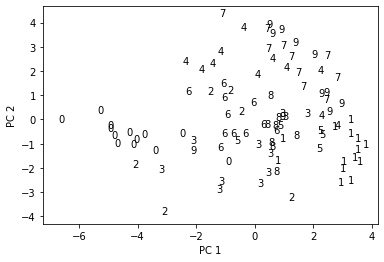

In [7]:
plot_PC(train_x[range(100),], pcs, train_y[range(100)])

# Cubic Features
In this section, we will work with a **cubic feature** mapping which maps an input vector  $x=[x1, \dots ,xd]$  into a new feature vector  $\phi(x)$ , defined so that for any  $x, \ x' \in \mathbb{R}^d$:

\begin{equation}
  \phi (x)^ T \phi (x') = (x^ T x' + 1)^3
\end{equation}

## Computing Cubic Features
In 2-D, let $ x=[x_1,x_2] $. Write down the explicit cubic feature mapping $ \phi (x)$  as a vector; i.e.,  $ \phi(x)=[f_1(x_1,x_2),⋯,f_N(x_1,x_2)]$.

In [ ]:
def phi(x):
    x_1 = x[0]
    x_2 = x[1]
    
    return np.array([1, 
                     x_1**3, 
                     x_2**3, 
                     sqrt(3) * x_1, 
                     sqrt(3) * x_2, 
                     sqrt(3) * x_1**2, 
                     sqrt(3) * x_1**2 * x_2, 
                     sqrt(3) * x_2**2, 
                     sqrt(3) * x_2**2 * x_1, 
                     sqrt(6) * x_1 * x_2])

## Applying to MNIST

If we explicitly apply the cubic feature mapping to the original 784-dimensional raw pixel features, the resulting representation would be of massive dimensionality. Instead, we will apply the quadratic feature mapping to the 10-dimensional PCA representation of our training data which we will have to calculate just as we calculated the 18-dimensional representation in the previous problem. After applying the cubic feature mapping to the PCA representations for both the train and test datasets, retrain the softmax regression model using these new features and report the resulting test set error below.

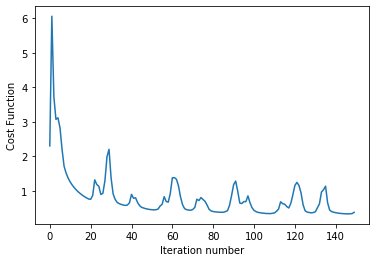

Test error for 18-dimensional PCA features =  0.08709999999999996


In [9]:
# Calculate 10-D PCA representation of training data
n_components = 10
pcs = principal_components(train_x)

# Store PCA representations
train_pca = project_onto_PC(train_x, pcs, n_components)
test_pca = project_onto_PC(test_x, pcs, n_components)

# Apply and store cubic feature mappings
train_pca = cubic_features(train_pca)
test_pca = cubic_features(test_pca)

# Retrain softmax regression model
theta, cost_function_history = softmax_regression(train_pca, train_y, temp_parameter=1, alpha= 0.3, lambda_factor = 1.0e-4, k = 10, num_iterations = 150)
plot_cost_function_over_time(cost_function_history)
test_error = compute_test_error(test_pca, test_y, theta, temp_parameter=1)
print('Test error for 18-dimensional PCA features = ', test_error)

The resulting figure is indicative of a learning rate that is too high, meaning that the gradient descent is overshooting.  In order to smooth out the curve, we should decrease `alpha`.

Test error =  0.10099999999999998
Test error =  0.06979999999999997
Test error =  0.07099999999999995


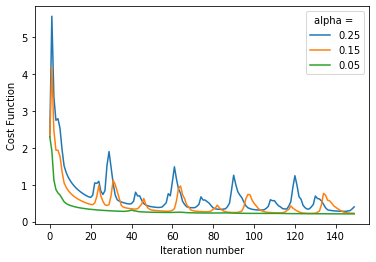

In [18]:
alpha = np.linspace(0.25, 0.05, 3)

for i in alpha:
    theta, cost_function_history = softmax_regression(train_pca, train_y, temp_parameter=1, alpha=i, lambda_factor = 1.0e-4, k = 10, num_iterations = 150)
    test_error = compute_test_error(test_pca, test_y, theta, temp_parameter=1)
    print('Test error = ', test_error)
    plt.plot(range(len(cost_function_history)), cost_function_history, label = str(i))
    
plt.ylabel('Cost Function')
plt.xlabel('Iteration number')
plt.legend(title='alpha = ')
plt.show()

The figure above shows the cost functions for decreasing values of the learning rate. It's apparent that the curve smooths out for `alpha = 0.15` and is completely smooth for `alpha = 0.05`. These values also result in improvements to the test error (~7%).

# Kernel Methods

As you can see, implementing a direct mapping to the high-dimensional features is a lot of work (imagine using an even higher dimensional feature mapping.) This is where the kernel trick becomes useful.

Recall the kernel perceptron algorithm we learned in the lecture. The weights $\theta$ can be represented by a linear combination of features:

\begin{equation}
  \theta = \sum _{i=1}^{n} \alpha ^{(i)} y^{(i)} \phi (x^{(i)})
\end{equation}

In the softmax regression fomulation, we can also apply this representation of the weights:

\begin{equation}
  \theta _ j = \sum _{i=1}^{n} \alpha _{j}^{(i)} y^{(i)} \phi (x^{(i)}).
\end{equation}

\begin{equation}
  h(x) = \frac{1}{\sum _{j=1}^ k e^{[\theta _ j \cdot \phi (x) / \tau ] - c}} \begin{bmatrix}  e^{[\theta _1 \cdot \phi (x) / \tau ] - c} \\ e^{[\theta _2 \cdot \phi (x) / \tau ] - c} \\ \vdots \\ e^{[\theta _ k \cdot \phi (x) / \tau ] - c} \end{bmatrix}
\end{equation}

\begin{equation}
  h(x) = \frac{1}{\sum _{j=1}^ k e^{[\sum _{i=1}^{n} \alpha _{j}^{(i)} y^{(i)} \phi (x^{(i)}) \cdot \phi (x) / \tau ] - c}} \begin{bmatrix}  e^{[\sum _{i=1}^{n} \alpha _{1}^{(i)} y^{(i)} \phi (x^{(i)}) \cdot \phi (x) / \tau ] - c} \\ e^{[\sum _{i=1}^{n} \alpha _{2}^{(i)} y^{(i)} \phi (x^{(i)}) \cdot \phi (x) / \tau ] - c} \\ \vdots \\ e^{[\sum _{i=1}^{n} \alpha _{k}^{(i)} y^{(i)} \phi (x^{(i)}) \cdot \phi (x) / \tau ] - c} \end{bmatrix}
\end{equation}

We actually do not need the real mapping  $\phi(x)$ , but the inner product between two features after mapping:  $\phi(x_i) \dot \phi(x)$ , where  $x_i$  is a point in the training set and  $x$  is the new data point for which we want to compute the probability. If we can create a kernel function  $K(x,y)=\phi(x) \dot \phi(y)$ , for any two points  $x$  and  $y$ , we can then kernelize our softmax regression algorithm.

## Implementing Polynomial Kernel

In the last section, we explicitly created a cubic feature mapping. Now, suppose we want to map the features into d dimensional polynomial space,

\begin{equation}
  \phi (x) = \langle x_ d^2, \ldots , x_1^2, \sqrt{2} x_ d x_{d-1}, \ldots , \sqrt{2} x_ d x_1, \sqrt{2} x_{d-1} x_{d-2}, \ldots , \sqrt{2} x_{d-1} x_{1}, \ldots , \sqrt{2} x_{2} x_{1}, \sqrt{2c} x_ d, \ldots , \sqrt{2c} x_1, c \rangle
\end{equation}

Write a function `polynomial_kernel` that takes in two matrices  $X$  and  $Y$  and computes the polynomial kernel $K(x,y)$  for every pair of rows  $x$  in  $X$  and  $y$  in  $Y$.

In [19]:
def polynomial_kernel(X, Y, c, p):
    """
        Compute the polynomial kernel between two matrices X and Y::
            K(x, y) = (<x, y> + c)^p
        for each pair of rows x in X and y in Y.

        Args:
            X - (n, d) NumPy array (n datapoints each with d features)
            Y - (m, d) NumPy array (m datapoints each with d features)
            c - a coefficient to trade off high-order and low-order terms (scalar)
            p - the degree of the polynomial kernel

        Returns:
            kernel_matrix - (n, m) Numpy array containing the kernel matrix
    """
    return np.power(X @ Y.T + c, p)
    raise NotImplementedError

## Gaussian RBF Kernel

Another commonly used kernel is the Gaussian RBF kenel. Similarly, write a function `rbf_kernel` that takes in two matrices  $X$  and  $Y$  and computes the RBF kernel  $K(x,y)$  for every pair of rows  $x$  in  $X$  and  $y$  in  $Y$.

In [21]:
def rbf_kernel(X, Y, gamma):
    """
        Compute the Gaussian RBF kernel between two matrices X and Y::
            K(x, y) = exp(-gamma ||x-y||^2)
        for each pair of rows x in X and y in Y.

        Args:
            X - (n, d) NumPy array (n datapoints each with d features)
            Y - (m, d) NumPy array (m datapoints each with d features)
            gamma - the gamma parameter of gaussian function (scalar)

        Returns:
            kernel_matrix - (n, m) Numpy array containing the kernel matrix
    """
    Xnorm = np.sum(X**2, axis=1)
    Ynorm = np.sum(Y**2, axis=1)
    cross = -2. * X @ Y.T
    return np.exp(-gamma *(Xnorm[:,None] + Ynorm[None,:] + cross))
    raise NotImplementedError


In [22]:
test.check_rbf_kernel()

PASS RBF kernel 
